In [1]:
# import os
# import pandas as pd
# import numpy as np
# import shutil
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# from torchvision import transforms
import torch
import torch.nn as nn

In [16]:
block_sizes, channels = [8, 14], [10, 32, 200, 640, 128, 256, 512]

In [37]:
in_channels = channels[1]
out_channels = channels[4]
kernel_size = 3
stride = 1
padding = 2
bs = 16
x = torch.rand(bs, in_channels, block_sizes[1], block_sizes[1])
# Define the convolutional layer
conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
print(conv(x).shape)

torch.Size([16, 128, 16, 16])


In [2]:
x = torch.rand(10, 32, 14, 14)
conv = nn.Conv2d(32, 128, kernel_size=3, padding=2)
conv(x).shape

torch.Size([10, 128, 16, 16])

In [4]:
block_size = 2
num_blocks = (x.shape[-1] // block_size)**2
print(num_blocks)

4


In [6]:
print(x)
for i in range(0, x.shape[-1], block_size):
    for j in range(0, x.shape[-1], block_size):
        print(x[:, :, i:i+block_size, j:j+block_size])

tensor([[[[0.1157, 0.1381, 0.4287, 0.9686],
          [0.8617, 0.5661, 0.7504, 0.9481],
          [0.6765, 0.0781, 0.1254, 0.5907],
          [0.0200, 0.2357, 0.4185, 0.8004]]]])
tensor([[[[0.1157, 0.1381],
          [0.8617, 0.5661]]]])
tensor([[[[0.4287, 0.9686],
          [0.7504, 0.9481]]]])
tensor([[[[0.6765, 0.0781],
          [0.0200, 0.2357]]]])
tensor([[[[0.1254, 0.5907],
          [0.4185, 0.8004]]]])


In [2]:
import pandas as pd

df = pd.read_csv('data/celeba/identity_CelebA.txt', delimiter=' ', header = None, names = ['filename', 'class'])
print(df)

          filename  class
0       000001.jpg   2880
1       000002.jpg   2937
2       000003.jpg   8692
3       000004.jpg   5805
4       000005.jpg   9295
...            ...    ...
202594  202595.jpg   9761
202595  202596.jpg   7192
202596  202597.jpg   9852
202597  202598.jpg   5570
202598  202599.jpg  10101

[202599 rows x 2 columns]


In [3]:
class_names = list(np.unique(np.array(df['class'].to_list())))

In [4]:
len(class_names)

10177

In [5]:
len(df['class'].to_list())

202599

In [6]:
filename_list = df['filename'].to_list()

In [7]:
len(filename_list)

202599

In [8]:
folders_dict = dict()
for i in range(len(filename_list)):
    class_name = df['class'][i]
    if class_name not in folders_dict.keys():
        folders_dict[class_name] = [df['filename'][i]]
    else:
        folders_dict[class_name].append(df['filename'][i])

In [9]:
master_path = 'data/celeba/processed/'
source_path = 'data/celeba/img_align_celeba/'

In [10]:
for class_name in folders_dict.keys():
    class_name_str = str(class_name)
    os.mkdir(master_path + class_name_str + '/')
    for filename in folders_dict[class_name]:
        old_path = os.path.join(source_path, filename)
        new_path = os.path.join(master_path, class_name_str + '/')
        shutil.move(old_path, new_path)

In [2]:
IMAGE_PATH = 'data/celeba/processed/'
batch_size = 64
image_size = 64

In [3]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageFolder(IMAGE_PATH, transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)

In [4]:
img, labels = next(iter(data_loader))

In [5]:
img.shape

torch.Size([64, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


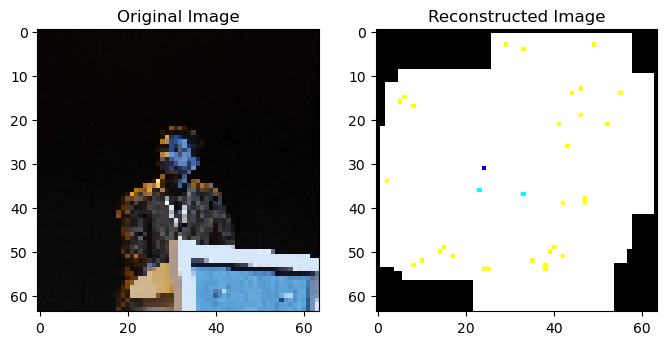

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import random

def generate_blocks(img):
    block_size = 32
    num_blocks = 16
    
    blocks = []
    for i in range(num_blocks):
        x = random.randint(0, img.shape[0] - block_size)
        y = random.randint(0, img.shape[1] - block_size)
        block = img[x:x+block_size, y:y+block_size, :]
        blocks.append(block)
        
    return blocks

def rearrange_blocks(blocks, block_coords):
    img = np.zeros((64,64,3))
    for i, block in enumerate(blocks):
        x, y = block_coords[i]  
        img[x:x+block.shape[0], y:y+block.shape[1], :] = block
        
    return img  

def generate_and_rearrange(img):
    blocks = generate_blocks(img)
    
    block_coords = []
    for block in blocks:
        x = random.randint(0, img.shape[0] - block.shape[0]) 
        y = random.randint(0, img.shape[1] - block.shape[1])
        block_coords.append((x, y))
        
    img_rearranged = rearrange_blocks(blocks, block_coords)
    
    return img_rearranged

# Example usage
image_size = (64, 64)
original_image = cv2.imread('/home/avideep/Pictures/test.jpg')
original_image = cv2.resize(original_image, (64, 64))

# Generate blocks
# blocks, block_positions = generate_blocks(original_image)

# Rearrange blocks to obtain the original image
reconstructed_image = generate_and_rearrange(original_image)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title('Reconstructed Image')

plt.show()

original_image = cv2.imread('/home/avideep/Pictures/test.jpg')


In [4]:
original_image.shape

(960, 952, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


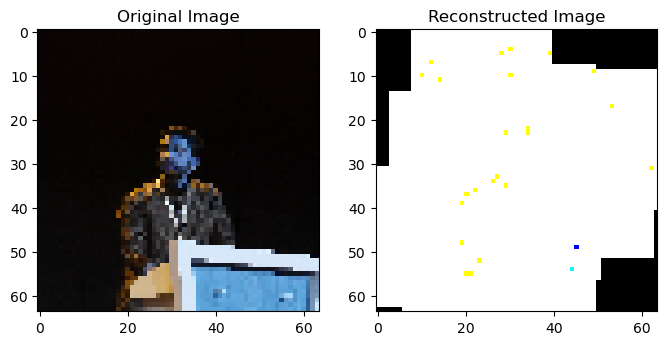

In [11]:

original_image = cv2.resize(original_image, (64, 64))
print(original_image.shape)
# Generate blocks
blocks, block_positions = generate_blocks(original_image)

# Rearrange blocks to obtain the original image
reconstructed_image = rearrange_blocks(blocks, block_positions, original_image.shape)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(reconstructed_image)
axes[1].set_title('Reconstructed Image')

plt.show()


In [33]:
import numpy as np
from PIL import Image

def generate_blocks(img):

    blocks = []
    used = np.zeros_like(img[:,:,0])

    for i in range(16):
       
        # Keep picking random crops until whole image covered
        while True:  
            x = np.random.randint(0, img.shape[0]-32)
            y = np.random.randint(0, img.shape[1]-32)
            
            if used[x:x+32,y:y+32].sum() < 1024:
                break
                
        block = img[x:x+32, y:y+32] 
        used[x:x+32, y:y+32] = 1
        blocks.append(block)

    return blocks
                
def rearrange_blocks(blocks, img):
    
    canvas = np.zeros_like(img)
    corners = []
    
    for block in blocks:
        
        x = np.random.randint(0, canvas.shape[0]-block.shape[0])  
        y = np.random.randint(0, canvas.shape[1]-block.shape[1]) 
        corners.append((x, y))
        
        canvas[x:x+32, y:y+32] = block
        
    return canvas, corners

img = np.random.rand(64, 64, 3)  
        
blocks = generate_blocks(img)
recon, _ = rearrange_blocks(blocks, img)
print(np.array_equal(img, recon))

False


In [1]:
import torch
a = torch.randn(16, 10, 64, 64)

In [10]:
import numpy as np
blocks = np.split(a, 2, axis=3)

In [11]:
blocks[0].shape

torch.Size([16, 10, 64, 32])

In [1]:
import torch

In [2]:
a = b = torch.randn(16,10,32,32)

In [3]:
torch.cat([a,b],dim=1).shape

torch.Size([16, 20, 32, 32])

In [1]:
import scann
from dataloader import CIFAR10, CelebAHQ
import torch
import numpy as np

2024-03-16 16:50:49.709754: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 16:50:49.711828: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 16:50:49.755883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 16:50:49.756578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 16:50:50.553895: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
data = CelebAHQ()

In [4]:
trainloader = data.train

In [5]:
dset = data.dset

AttributeError: 'CelebAHQ' object has no attribute 'dset'

In [2]:
dset = torch.rand((30000,10,32,32))

In [16]:
encoder = data.encoder

In [17]:
x, _ = next(iter(trainloader))

In [18]:
x.shape

torch.Size([16, 3, 256, 256])

In [19]:
x_clip = data.get_encodings(x)

In [3]:
x_clip = torch.rand(16, 10240)

In [12]:
normalized_dset = (dset / np.linalg.norm(dset, axis=1)[:, np.newaxis]).view(30000,-1)

In [5]:
%%time
searcher = scann.scann_ops_pybind.builder(normalized_dset, 10, "dot_product").tree(
    num_leaves=2000, num_leaves_to_search=100, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(100).build()

CPU times: user 13h 20min 1s, sys: 2min 39s, total: 13h 22min 41s
Wall time: 20min 18s


2024-03-16 16:51:14.781297: I scann/partitioning/partitioner_factory_base.cc:59] Size of sampled dataset for training partition: 30000
2024-03-16 17:07:47.567231: I ./scann/partitioning/kmeans_tree_partitioner_utils.h:84] PartitionerFactory ran in 16m32.785867434s.


In [8]:
%%time
neighbors, distances = searcher.search_batched(x_clip, leaves_to_search=150, pre_reorder_num_neighbors=250)

CPU times: user 81 ms, sys: 4 µs, total: 81 ms
Wall time: 80.1 ms


In [9]:
neighbors.shape

(16, 10)

In [10]:
neighbors

array([[16280, 14496, 18776,  5616, 14725, 10066, 25145, 15452,  5695,
        22242],
       [11450, 15139, 29127, 19329, 10003,  3551,   327, 10910, 26257,
        22191],
       [12112, 24240, 26683,  4863, 16802,  1096, 20483,  3976,  2236,
         6932],
       [26970,  1811, 14725, 27424,  6794, 12829, 27025, 13821, 26904,
        16520],
       [28984, 17802, 19140,  7030, 26287,  9732, 10932, 10883, 12489,
         1673],
       [20120,  4913, 28822,  9061,   449, 25261, 29690, 15299, 11400,
         9198],
       [ 1720, 21535, 27493, 21101, 10520, 27353, 22184,  2395, 18685,
        15912],
       [ 5384,  7030, 11450, 14951,  4863, 22489,  4394, 26127,  1695,
         8148],
       [ 5092, 22129,  5158, 24925, 15036, 19904, 18295, 22680, 27609,
        23957],
       [  140, 24598, 24622, 14598, 26762, 23798, 17444, 10951,  4578,
        13012],
       [16992,  3913, 24311, 10423,  3519, 11396, 22232, 11615,  1209,
        15271],
       [17745, 16613, 14889, 24671,  7891, 

In [13]:
neib = normalized_dset[np.int64(neighbors[0])]

In [14]:
neib.shape

torch.Size([10, 10240])

In [15]:
def make_neighbor_matrix(neighbors, dset):
    mat = []
    for neighbor in neighbors:
        mat.append(dset[np.int64(neighbor)])
    return torch.stack(mat)

In [16]:
neighbor_matrix = make_neighbor_matrix(neighbors,normalized_dset)

In [17]:
len(neighbor_matrix)

16

In [18]:
neighbor_matrix.shape

torch.Size([16, 10, 10240])

In [19]:
neighbor_matrix

tensor([[[0.0372, 0.0162, 0.0283,  ..., 0.2961, 0.1824, 0.3263],
         [0.0770, 0.4204, 0.0614,  ..., 0.0348, 0.2252, 0.3736],
         [0.0173, 0.4839, 0.1670,  ..., 0.3618, 0.1019, 0.4891],
         ...,
         [0.4913, 0.1124, 0.3967,  ..., 0.0302, 0.3930, 0.3690],
         [0.0123, 0.3142, 0.4498,  ..., 0.1945, 0.1868, 0.1734],
         [0.4920, 0.1615, 0.2365,  ..., 0.3264, 0.3340, 0.0046]],

        [[0.3615, 0.4800, 0.4086,  ..., 0.4393, 0.0463, 0.3665],
         [0.3390, 0.3713, 0.3324,  ..., 0.1103, 0.2187, 0.2309],
         [0.5155, 0.2575, 0.3753,  ..., 0.2395, 0.4669, 0.3765],
         ...,
         [0.2457, 0.4035, 0.4441,  ..., 0.3464, 0.2462, 0.2198],
         [0.4559, 0.3202, 0.1395,  ..., 0.1810, 0.2020, 0.1887],
         [0.1712, 0.3429, 0.4876,  ..., 0.1556, 0.2911, 0.2072]],

        [[0.3167, 0.1722, 0.4432,  ..., 0.4621, 0.3406, 0.4300],
         [0.4513, 0.4425, 0.1365,  ..., 0.4030, 0.1921, 0.3193],
         [0.2988, 0.1077, 0.4188,  ..., 0.0651, 0.5356, 0.

In [20]:
distances

array([[1427.6368, 1426.9172, 1426.6736, 1425.7695, 1425.1958, 1424.9917,
        1424.73  , 1424.1182, 1424.0312, 1423.8364],
       [1433.1831, 1432.8154, 1432.3281, 1432.2935, 1432.1848, 1431.0618,
        1430.6151, 1430.5171, 1430.3052, 1429.8944],
       [1439.7   , 1437.9705, 1436.4957, 1436.0735, 1435.9844, 1435.7462,
        1435.6628, 1435.5947, 1435.4102, 1435.2876],
       [1427.9231, 1427.5042, 1427.2346, 1426.668 , 1426.6367, 1426.3953,
        1425.5891, 1425.3495, 1425.329 , 1425.3203],
       [1434.9873, 1433.8091, 1433.2107, 1433.1787, 1432.9541, 1432.6389,
        1431.7952, 1430.9412, 1430.7947, 1430.6423],
       [1424.8086, 1423.6101, 1420.0184, 1419.9062, 1419.8286, 1418.6274,
        1418.4794, 1418.3654, 1418.2068, 1418.1997],
       [1430.4906, 1429.7233, 1429.6084, 1429.5171, 1429.4636, 1428.729 ,
        1427.8856, 1427.7888, 1427.5281, 1427.4733],
       [1440.5557, 1436.9271, 1436.8927, 1434.5593, 1434.0247, 1433.6382,
        1433.3523, 1433.1003, 1432.94

In [4]:
import torch
import torch.nn.functional as F
# Assuming your condition tensor is named 'condition' and has shape (10, 512)
condition = torch.rand((1, 2, 8))
input_shape = (1, 2, 4, 4)
b, c, h, w = input_shape
condition = condition.view(b,c,h,-1)
pad = (2,2)
input = torch.rand(input_shape)
output = F.pad(condition, pad, "constant", 0)
output

tensor([[[[0.0000, 0.0000, 0.5010, 0.0499, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.5405, 0.5152, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1153, 0.5376, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3352, 0.1458, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.8031, 0.1613, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.6341, 0.6133, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1702, 0.6066, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.5321, 0.2214, 0.0000, 0.0000]]]])

In [1]:
import matplotlib.pyplot as plt
import os

def plot_images(image_dir):

    # Get the list of image file names
    image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])

    # Create a figure and axis
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(image_files):
        img = plt.imread(image_file)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list
def plot_images2(image_dir):

    # Get the list of image file names
#     image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])
    image_files = list_files(image_dir)
    # Create a figure and axis
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(image_files):
        img = plt.imread(image_file)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


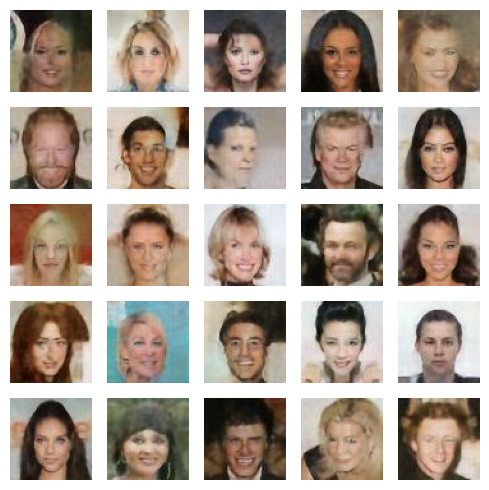

In [2]:
plot_images('samples')

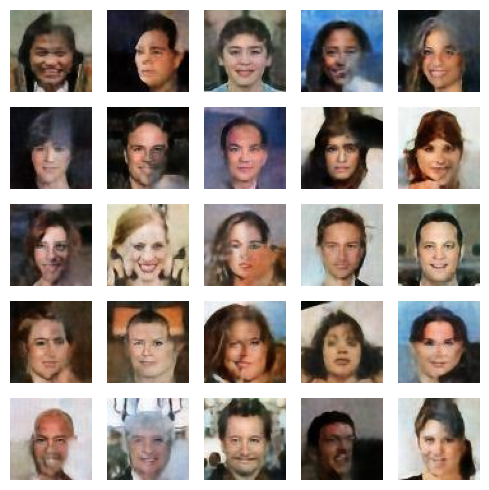

In [11]:
plot_images('samples/new_figure/new/')

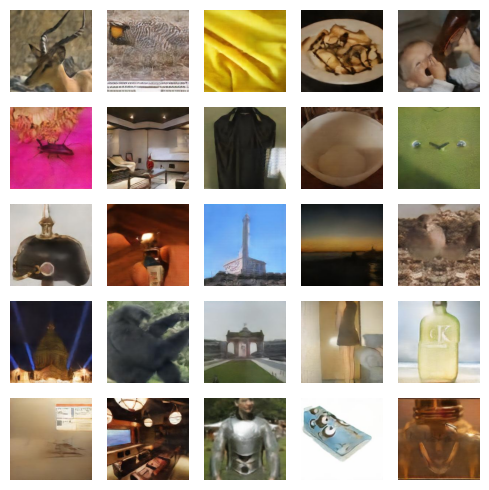

In [9]:
plot_images2('samples/new_figure/imagenet_samples/new_figure/')

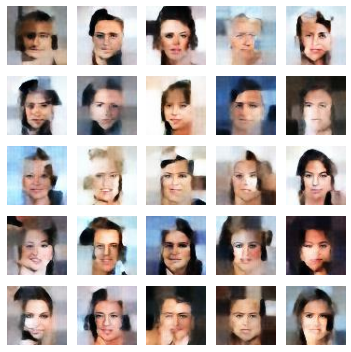

In [4]:
plot_images2('/home/avideep/Pictures/samples/new_figure/blocks_16/')

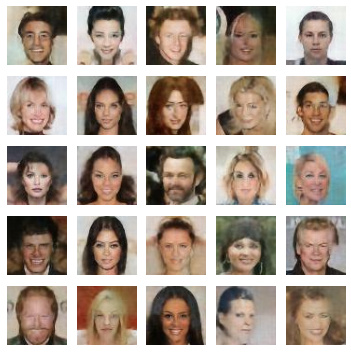

In [5]:
plot_images2('/home/avideep/Pictures/samples/new_figure/blocks_4/')

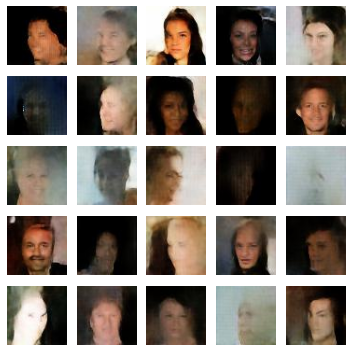

In [2]:
plot_images2('/home/avideep/Pictures/samples/new_figure/baseline/')

In [2]:
from dataloader import PlantNet, CIFAR10, CelebA, CelebAHQ, ImageNet100

2024-04-03 11:20:59.451465: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 11:20:59.505921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 11:21:00.323721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = ImageNet100()

In [5]:
x, _ = next(iter(data.train))

In [6]:
x.shape

torch.Size([16, 3, 224, 224])

In [9]:
import torch

In [10]:
import os
import random
import torch
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
import numpy as np
from PIL import Image
import torch.nn.functional as F
from tqdm import tqdm

In [13]:
def tensor2img(tensor):
    """ Convert torch.Tensor to PIL image. """
    n_channels = tensor.shape[0]

    img = tensor.detach().cpu()
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]
    inv_normalize = transforms.Compose([
            transforms.Normalize(mean=0, std=[1./s for s in std]),
            transforms.Normalize(mean=[-m for m in mean], std=1.),
            lambda x: x*255
        ])
    img = inv_normalize(img)

    if n_channels > 1:
        return Image.fromarray(img.permute(1, 2, 0).numpy().astype('uint8')).convert("RGB")
    else:
        return Image.fromarray(img[0].numpy()).convert("L")

In [18]:
def plot_tensor_images(x):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(x):
        axs[i].imshow(tensor2img(image_file))
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

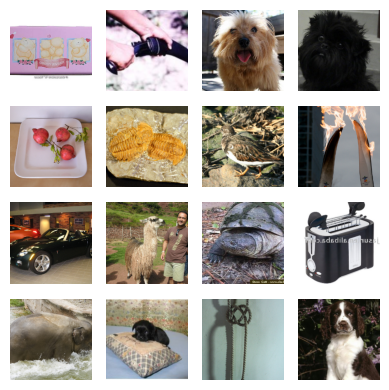

In [19]:
plot_tensor_images(x)

In [16]:
block_size = 112

In [17]:
y = torch.randn_like(x)

In [21]:
position = 0
for i in range(0, x.shape[-1], block_size):
    for j in range(0, x.shape[-1], block_size):
        # if j==0 and i>0:
            #         prev_block = x[:,:,i-block_size:i, j:j+block_size]
            print(position)
            block_pos = torch.full((x.size(0),),position, dtype=torch.int64).to(device)
            curr_block = x[:, :, i:i+block_size, j:j+block_size]
            y[:, :, i:i+block_size, j:j+block_size] = curr_block
            position += 1
plot_tensor_images(y)  

0


NameError: name 'device' is not defined

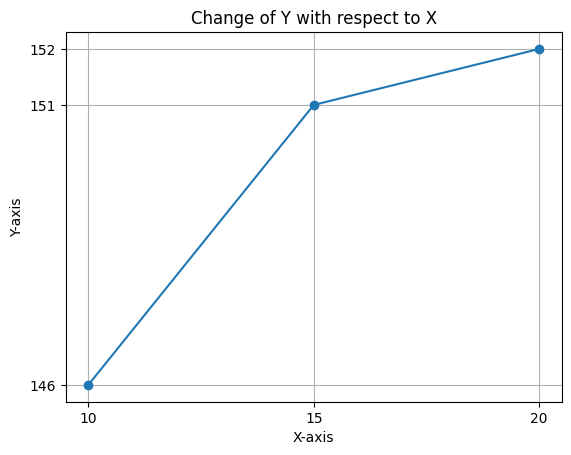

In [8]:
import matplotlib.pyplot as plt

# Values for x-axis and y-axis
x_values = [10, 15, 20]
y_values = [146, 151, 152]

# Plotting the values
plt.plot(x_values, y_values, marker='o')

# Set the x-axis and y-axis ticks to integers only
plt.xticks(x_values)
plt.yticks(y_values)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change of Y with respect to X')

# Displaying the plot
plt.grid(True)
plt.show()


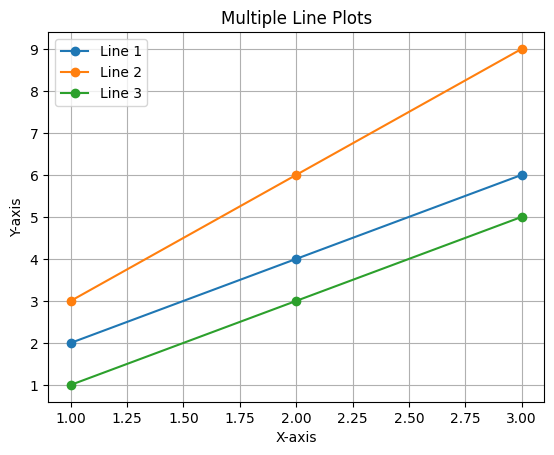

In [10]:
import matplotlib.pyplot as plt

# Values for x-axis and y-axis for the first line plot
x_values = [10, 15, 20]
y_values1 = [2, 4, 6]

# Values for y-axis for the second line plot
y_values2 = [3, 6, 9]

# Values for y-axis for the third line plot
y_values3 = [1, 3, 5]

# Plotting the first line plot
plt.plot(x_values, y_values1, marker='o', label='Line 1')

# Plotting the second line plot
plt.plot(x_values, y_values2, marker='o', label='Line 2')

# Plotting the third line plot
plt.plot(x_values, y_values3, marker='o', label='Line 3')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Plots')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


In [1]:
import os
import torch
import argparse
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
import numpy as np
from PIL import Image
import torch.nn.functional as F
import os
import math
from argparse import ArgumentParser
import random
from glob import glob
from multiprocessing import cpu_count
import numpy as np
import scann
import gc
import torch
from dsetbuilder_vqgan import DSetBuilder
from einops import rearrange
from omegaconf import OmegaConf
from pytorch_lightning import seed_everything
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.dataloader import default_collate
from tqdm import tqdm
import matplotlib.pyplot as plt
import yaml
from model import VQGANLight
from utils.helpers import load_model_checkpoint, timer
import time
from dataloader import CelebA, CelebAHQ, CIFAR10, ImageNet100

2024-05-10 14:43:07.870483: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 14:43:07.927319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 14:43:08.794348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [3]:
@torch.no_grad()
def encode(model, x: torch.Tensor):
    x = model.encode(x)
    x = model.quantize(x)
    return x

In [16]:
def show_tensor(image_tensor):
    # Convert torch tensor to numpy array
    image_np = image_tensor.permute(1, 2, 0).cpu()#.numpy()
    # Display the image using matplotlib
    # plt.imshow(image_np) 
    plt.imshow(image_np)

    plt.axis('off')  # Turn off axis labels
    plt.show()
def show_and_save(image_tensor, path):
    # Convert torch tensor to numpy array
    image_np = image_tensor.permute(1, 2, 0).cpu()#.numpy()
    # Display the image using matplotlib
    # plt.imshow(image_np) 
    plt.imshow(image_np)
    plt.axis('off')  # Turn off axis labels
    plt.savefig(path, bbox_inches='tight', dpi=300)
    plt.show()

In [21]:
vqgan_config = 'configs/vqgan_rgb.yaml'

vqgan_path = 'checkpoints/vqgan/24-03-29_153956/best_model.pt'

cfg_vqgan = yaml.load(open(vqgan_config, 'r'), Loader=yaml.Loader)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

vqgan_model = VQGANLight(**cfg_vqgan['model'])

vqgan_model, _, _ = load_model_checkpoint(vqgan_model, vqgan_path, device)
vqgan_model.to(device)
count_parameters(vqgan_model)

batch_size = 1
dset_batch_size = 64
data = ImageNet100(batch_size = batch_size, dset_batch_size = dset_batch_size)

dset = DSetBuilder(data, k=10, model=vqgan_model, device=device, block_factor=2)

Loaded checkpoint : checkpoints/vqgan/24-03-29_153956/best_model.pt (epoch: 278)
DSET with shape: torch.Size([4, 127778, 6272]) is ready!
Loading pre-trained searcher from /hdd/avideep/blockLDM/data/dset/ImageNet100/vqgan/searcher_k_10_f_2/
Finished loading searcher.


In [6]:
fig_dict = torch.load('figure_dict.pth')

In [7]:
x_query = fig_dict['x_query']
indices = fig_dict['indices']
neighbor_ids = fig_dict['neighbor_ids']
neighbors = fig_dict['neighbors']
samples = fig_dict['samples']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


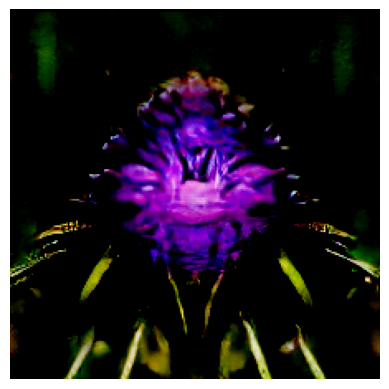

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


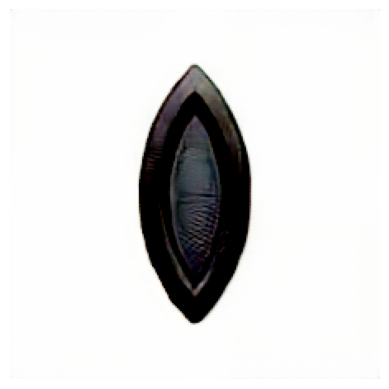

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


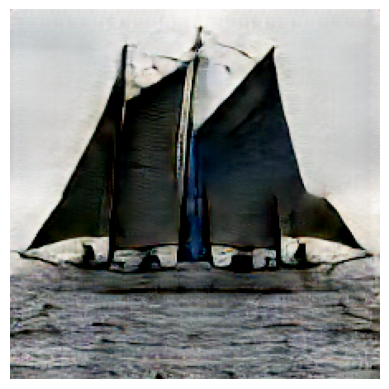

In [9]:
sample_size = x_query.size(0)
x_query = x_query.view(sample_size, 32, 14, 14)
full_x_query = torch.rand(sample_size, 32, 28, 28)
patch_size = 14
img_size = 28
position = 0
for i in range(0, img_size, patch_size):
    for j in range (0, img_size, patch_size):
        full_x_query[:, :, i:i+patch_size, j:j+patch_size] = dset.dset[position][indices].view(sample_size, 32, 14, 14)
        position += 1
full_x_query_decoded = vqgan_model.decode(full_x_query.to(device))
for i, x_q in enumerate(full_x_query_decoded):
    show_and_save(x_q.detach(), f"samples/new_figure/imagenet_queries/q_{i}.png")

In [10]:
neighbors = torch.rand(3, 10, 32, 28, 28)
for one_query in range(sample_size):
    position = 0
    for i in range(0, img_size, patch_size):
        for j in range (0, img_size, patch_size):
            neighbors[one_query, :, :, i:i+patch_size, j:j+patch_size] = dset.dset[position][neighbor_ids[one_query].astype(np.int32)].view(10, 32, 14, 14)
            position += 1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


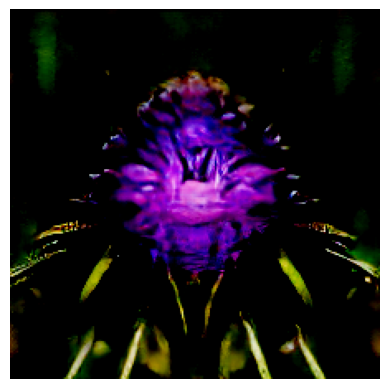

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


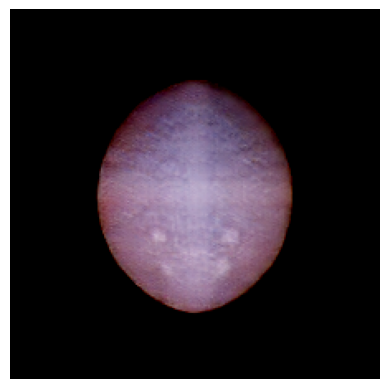

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


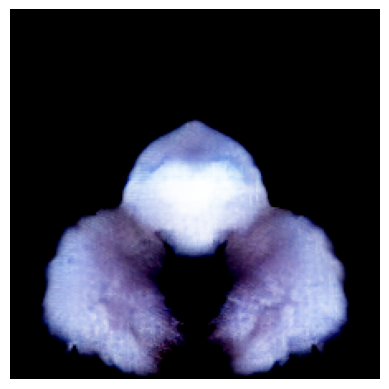

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


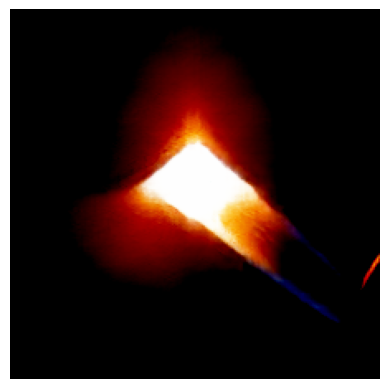

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


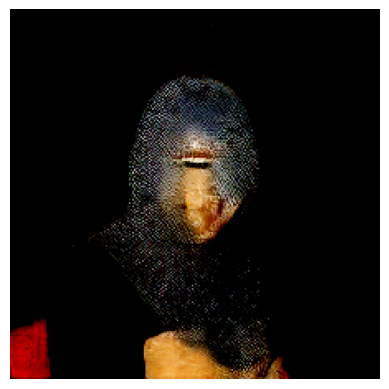

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


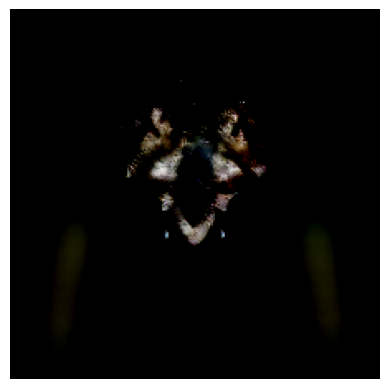

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


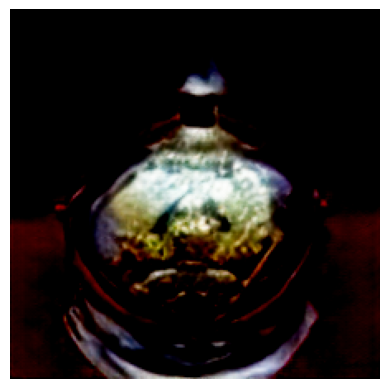

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


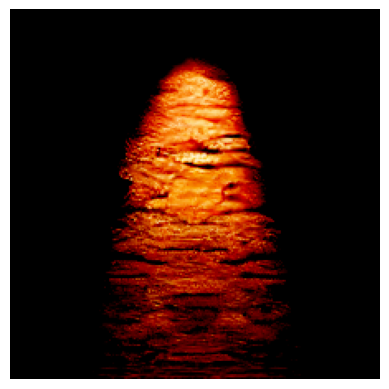

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


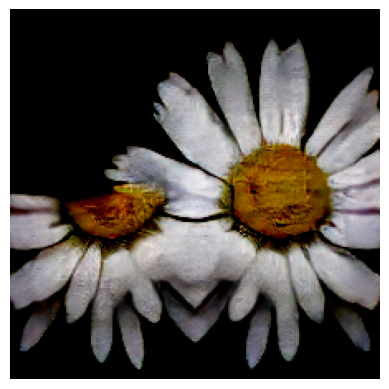

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


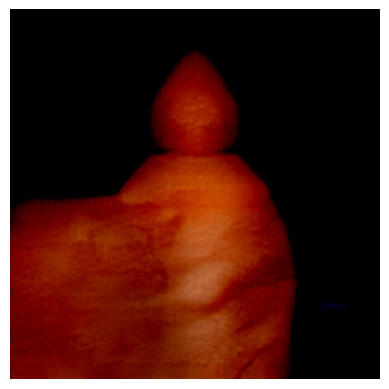

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


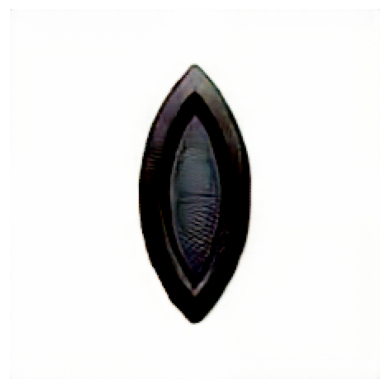

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


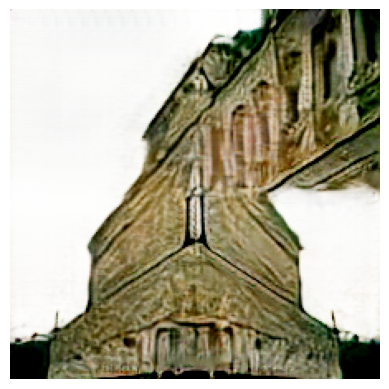

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


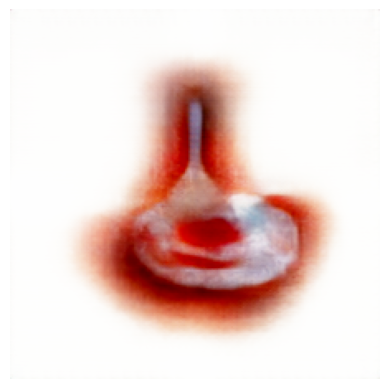

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


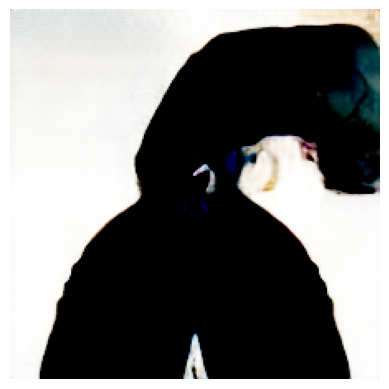

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


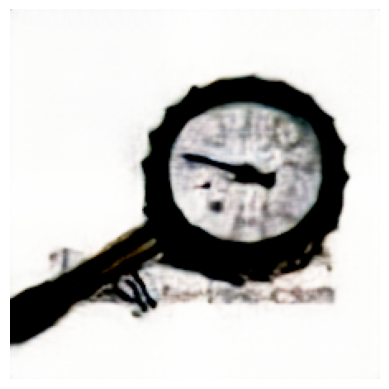

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


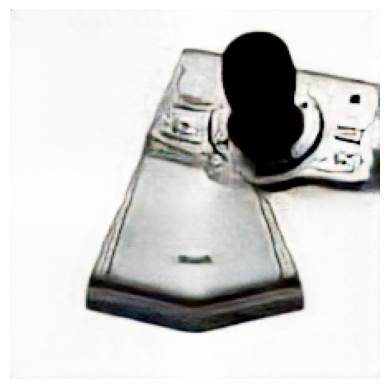

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


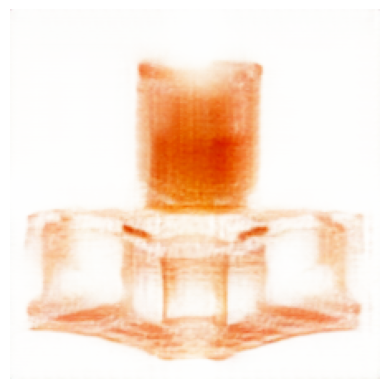

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


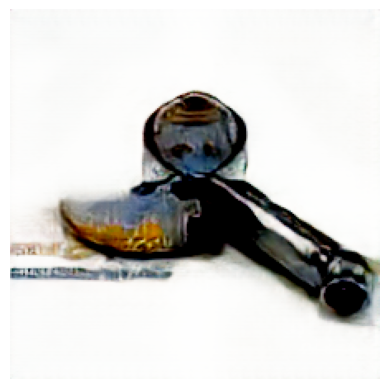

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


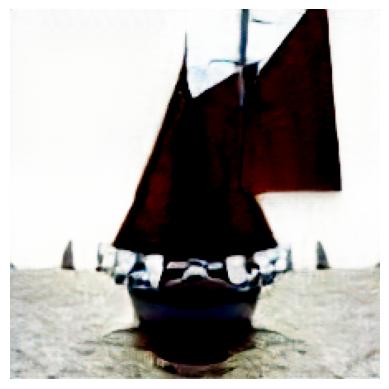

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


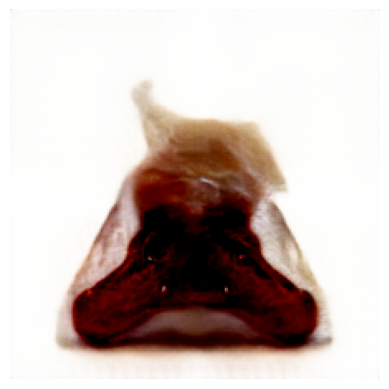

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


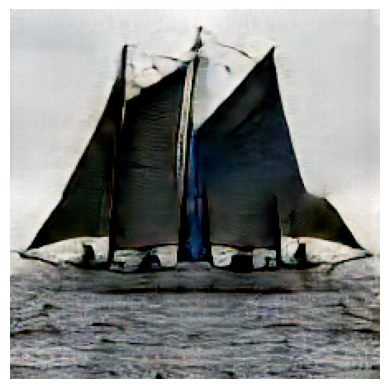

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


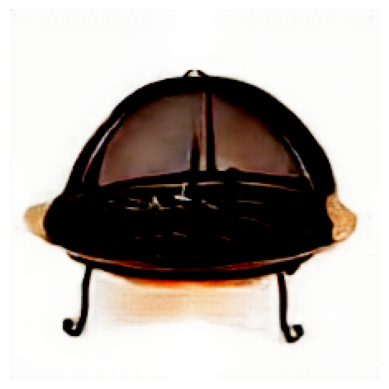

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


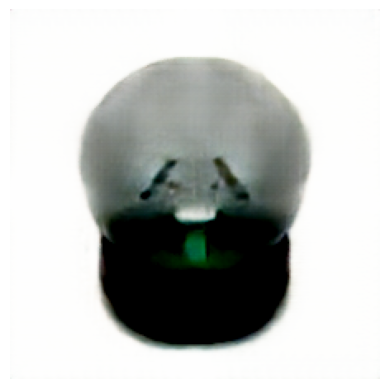

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


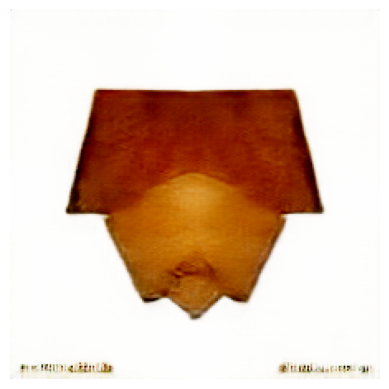

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


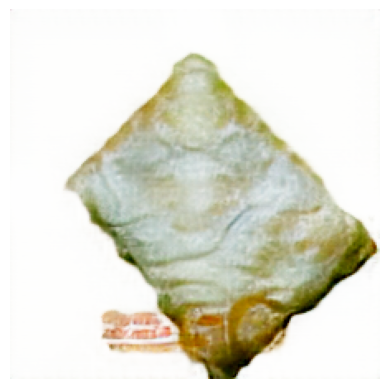

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


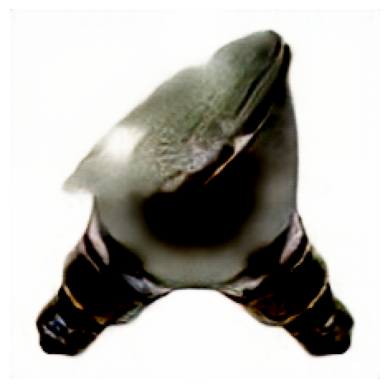

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


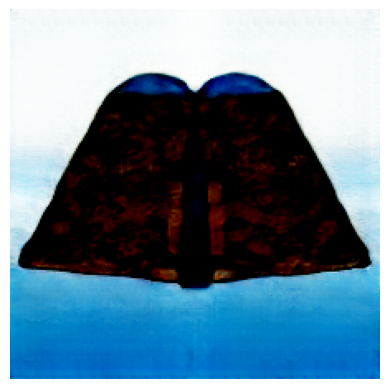

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


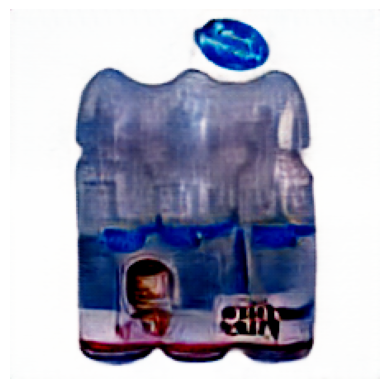

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


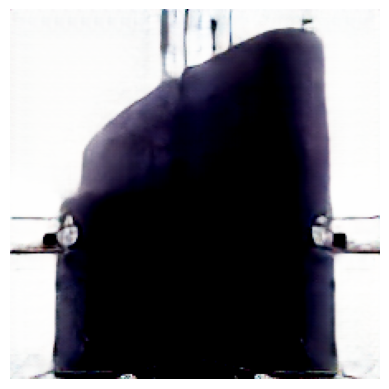

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


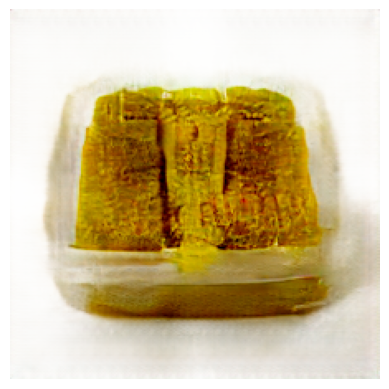

In [11]:
for s in range(sample_size):
    f_n_decoded = vqgan_model.decode(neighbors[s].to(device))    
    for i,n in enumerate(f_n_decoded):
        show_and_save(n.detach(),f"samples/new_figure/imagenet_neighbors/n_q_{s}/{i}.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


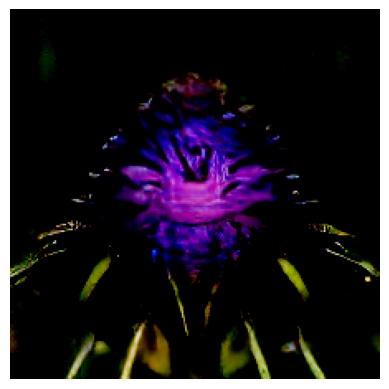

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


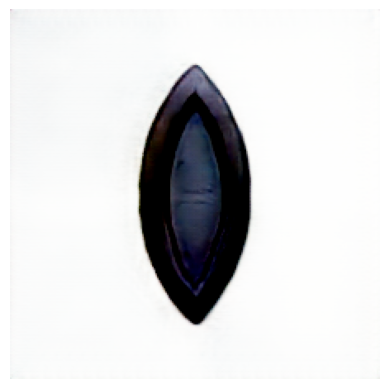

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


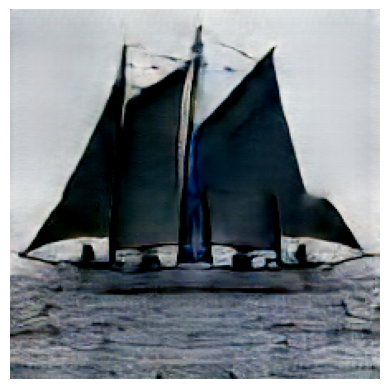

In [12]:
for s in samples:
    show_tensor(s.detach())

In [6]:
x = torch.rand(8, 3, 224, 224).to(device)
z = encode(vqgan_model, x)

In [7]:
z.shape

torch.Size([8, 32, 28, 28])

In [8]:
x_prime = vqgan_model.decode(z)
x_prime.shape

torch.Size([8, 3, 224, 224])

In [9]:
z_prime = torch.rand(8, 32, 14, 14).to(device)
vqgan_model.decode(z_prime).shape

torch.Size([8, 3, 112, 112])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


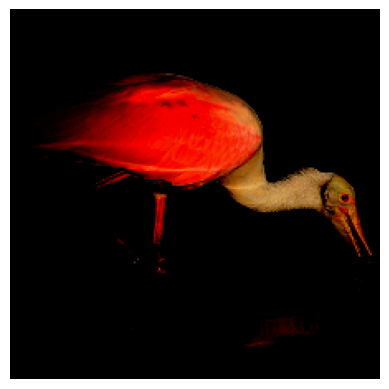

In [13]:
x = next(iter(data.val))[0].to(device)
show_tensor(x)

In [14]:
x.shape

torch.Size([1, 3, 224, 224])

In [15]:
img_size, patch_size = 28, 14

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


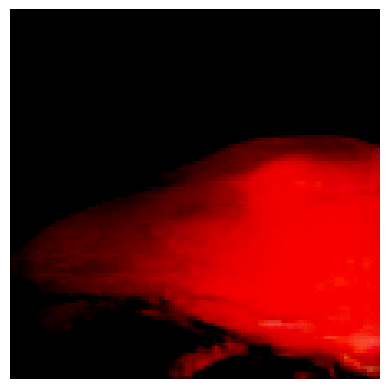

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


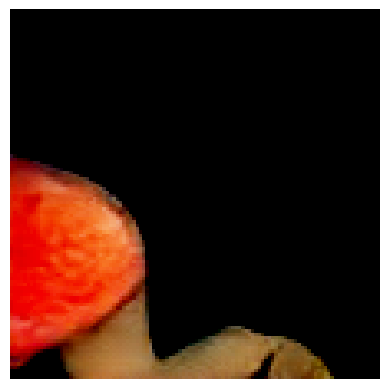

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


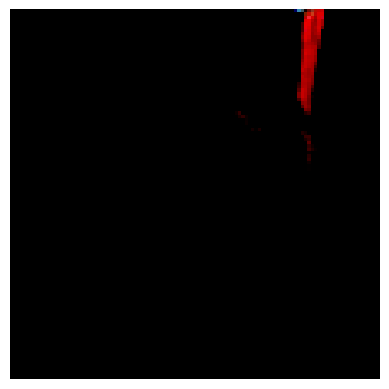

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


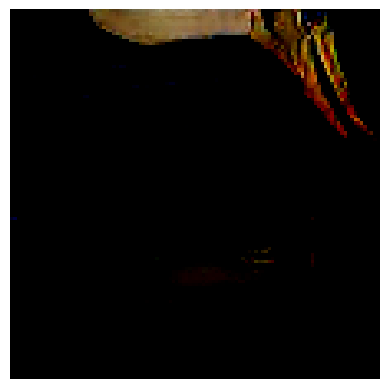

In [21]:
z = encode(vqgan_model, x)
for i in range(0, img_size, patch_size):
    for j in range (0, img_size, patch_size):
        patch = z[:, :, i:i+patch_size, j:j+patch_size]
        patch_decoded = vqgan_model.decode(patch).detach()
        show_tensor(patch_decoded)

In [29]:
q1d = dset.get_rand_queries(1)
neighbor_ids = dset.get_neighbor_ids(q1d)
q2d = q1d.view(1, 32, 14, 14)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


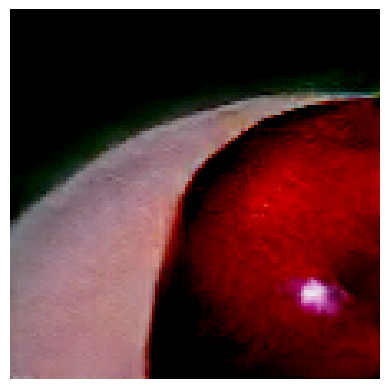

In [44]:
show_tensor(vqgan_model.decode(q2d.to(device)).detach())

In [45]:
neighbors = dset.get_neighbors(neighbor_ids, 1, 14, 1, 32).to(device)

In [46]:
neighbors = neighbors.view(10, 32, 14, 14)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


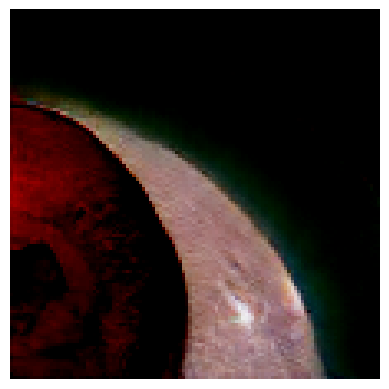

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


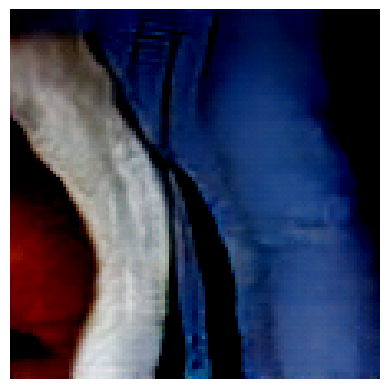

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


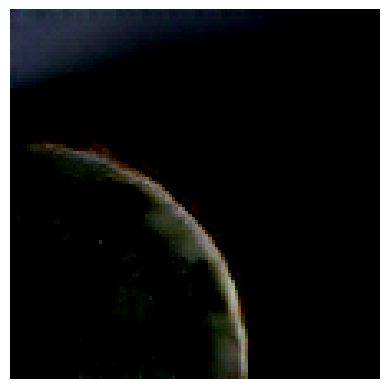

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


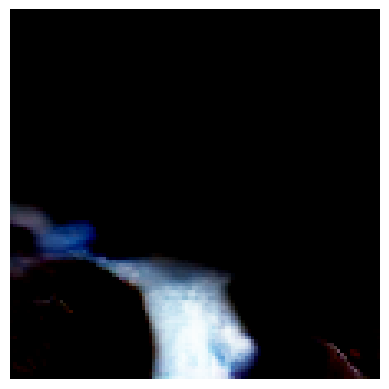

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


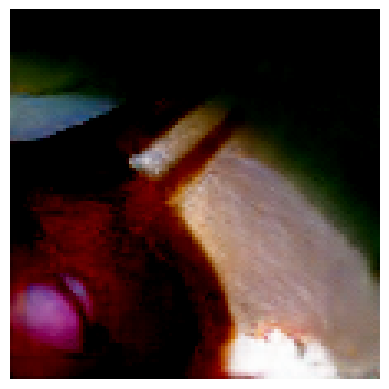

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


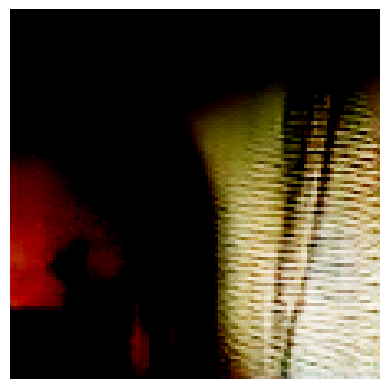

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


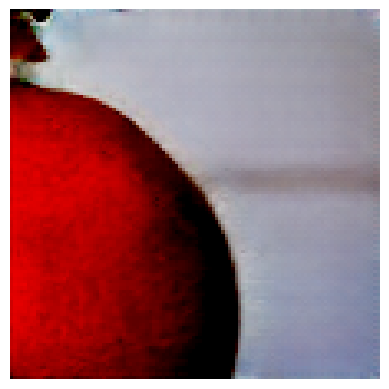

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


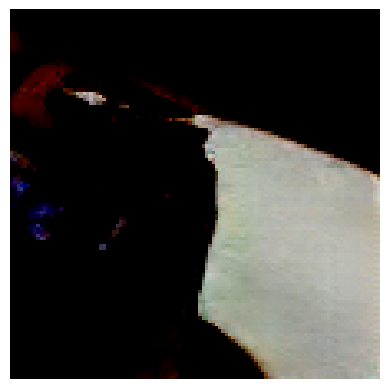

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


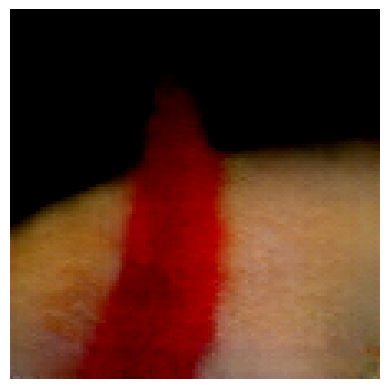

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


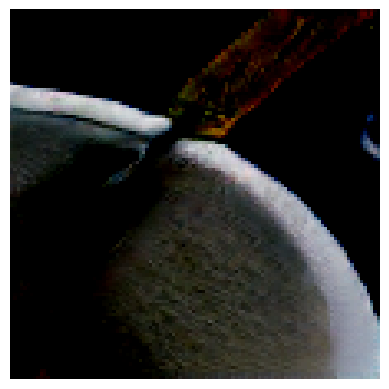

In [47]:
for n in neighbors:
    n_decoded = vqgan_model.decode(n).detach()
    show_tensor(n_decoded)

In [139]:
def get_neighbor_paths(i):
    image_paths = []
    for k in [1,2,3]:
        image_path = [f'samples/new_figure/q{i}/neighbors/']*10
        filenames = os.listdir(f'samples/new_figure/q{k}/neighbors/')
        for j in range(10):
            image_path[j] += filenames[j]
        image_paths.append(image_path)
    if i == 1:
        return [x for xs in image_paths for x in xs][:10]
    elif i==2:
        return [x for xs in image_paths for x in xs][10:20]
    else:
        return [x for xs in image_paths for x in xs][-10:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


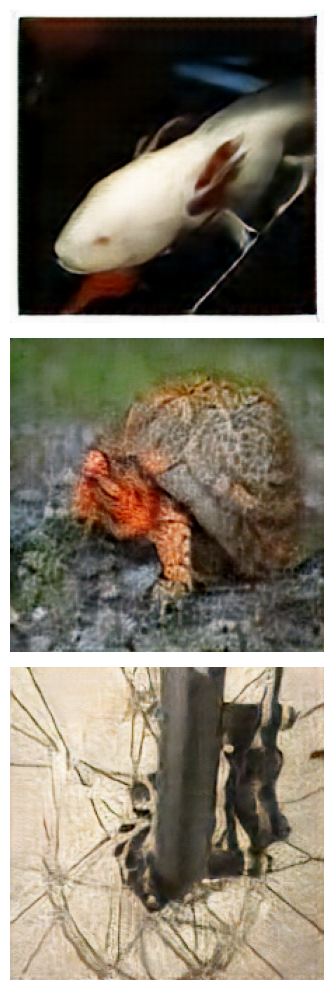

In [182]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
image_paths = ['samples/new_figure/q1/sample.png', 'samples/new_figure/q2/sample.png', 'samples/new_figure/q3/sample.png']  # Replace these with the paths to your images
# image_paths = ['samples/new_figure/q1/query.png', 'samples/new_figure/q2/query.png', 'samples/new_figure/q3/query.png'] 
# image_paths = get_neighbor_paths(3)
images = [Image.open(path) for path in image_paths]

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),           # Convert to tensor
])

# Apply the transformation to each image
tensor_images = torch.stack([transform(image)[:3] for image in images[:4]])
z = encode(vqgan_model, tensor_images.to(device))
x_p = vqgan_model.decode(z)


# Create a figure and axis for each image
fig, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot each resized image
for i, image in enumerate(x_p):
    axes[i].imshow(image.cpu().detach().permute(1,2,0))
    axes[i].axis('off')
plt.savefig('samples/samples.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

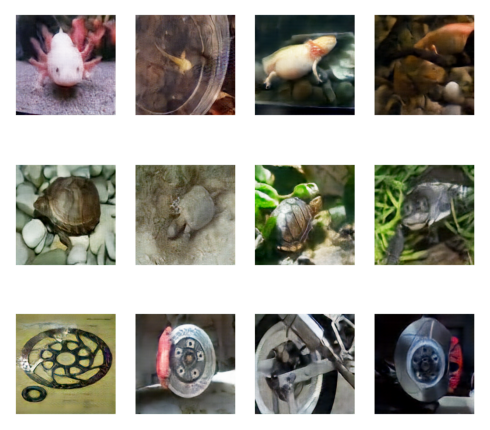

In [185]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
# image_paths = ['samples/new_figure/q1/sample.png', 'samples/new_figure/q2/sample.png', 'samples/new_figure/q3/sample.png']  # Replace these with the paths to your images
image_paths = ['samples/n1.png', 'samples/n2.png', 'samples/n3.png'] 
# image_paths = get_neighbor_paths(3)
images = [Image.open(path) for path in image_paths]

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to 224x224
#     transforms.ToTensor(),           # Convert to tensor
# ])

# # Apply the transformation to each image
# tensor_images = torch.stack([transform(image)[:3] for image in images[:4]])
# z = encode(vqgan_model, tensor_images.to(device))
# x_p = vqgan_model.decode(z)


# Create a figure and axis for each image
fig, axes = plt.subplots(3, 1, figsize=(5,5))

# Plot each resized image
for i, image in enumerate(images):
    axes[i].imshow(np.array(image))
    axes[i].axis('off')
plt.savefig('samples/compact.png', bbox_inches='tight', dpi=300)
plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.show()

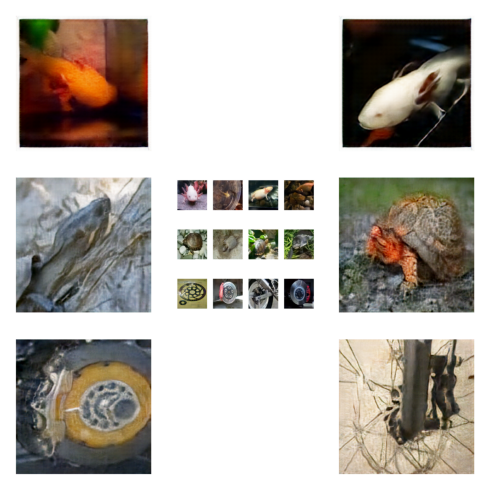

In [186]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
# image_paths = ['samples/new_figure/q1/sample.png', 'samples/new_figure/q2/sample.png', 'samples/new_figure/q3/sample.png']  # Replace these with the paths to your images
image_paths = ['samples/queries.png', 'samples/compact.png', 'samples/samples.png'] 
# image_paths = get_neighbor_paths(3)
images = [Image.open(path) for path in image_paths]

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to 224x224
#     transforms.ToTensor(),           # Convert to tensor
# ])

# # Apply the transformation to each image
# tensor_images = torch.stack([transform(image)[:3] for image in images[:4]])
# z = encode(vqgan_model, tensor_images.to(device))
# x_p = vqgan_model.decode(z)


# Create a figure and axis for each image
fig, axes = plt.subplots(1, 3, figsize=(5,5))

# Plot each resized image
for i, image in enumerate(images):
    axes[i].imshow(np.array(image))
    axes[i].axis('off')
plt.savefig('samples/final.png', bbox_inches='tight', dpi=300)
plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.show()